# 객체를 디스크에 쓰기 

In [1]:
!mkdir path

In [2]:
# 새로운 파일 만들기
path = 'C:/Users/anrnd/Desktop/파이썬 금융분석/path/'

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5,2) for i in range(1000000)]

In [5]:
import pickle
import time

#  1. open( , 'wb') 쓰기위한 파일 열기
#  2. .close()
#  3. open( , 'rb') 읽기위한 파일 열기
#  4. .close() 

객체 1개

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')

In [7]:
%time pickle.dump(a, pkl_file)

Wall time: 37.9 ms


In [8]:
pkl_file

<_io.BufferedWriter name='C:/Users/anrnd/Desktop/파이썬 금융분석/path/data.pkl'>

In [9]:
pkl_file.close()

In [10]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,779,854,336 바이트 남음


In [11]:
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)

Wall time: 56.3 ms


In [12]:
b[:5]

[4.340143332081608,
 -1.9292933756599915,
 -0.6454120535633829,
 4.447551278511609,
 -0.1473685039685475]

In [13]:
a[:5]

[4.340143332081608,
 -1.9292933756599915,
 -0.6454120535633829,
 4.447551278511609,
 -0.1473685039685475]

In [14]:
# a,b 가 같은지 확인하는 방법
# 1
np.allclose(np.array(a),np.array(b))

# 2
np.sum(np.array(a)-np.array(b))

0.0

객체 2개

In [15]:
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(np.array(a), pkl_file)

Wall time: 35.2 ms


In [16]:
%time pickle.dump(np.array(a)**2, pkl_file)

Wall time: 36.9 ms


In [17]:
pkl_file.close()

In [18]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,772,805,120 바이트 남음


In [19]:
pkl_file = open(path + 'data.pkl', 'rb')

In [20]:
x = pickle.load(pkl_file)          # First in First out : 자동으로 순서대로 출력 
x                                  # -> 어떤 객체에 저장되어있는지 모르는 단점

array([ 4.34014333, -1.92929338, -0.64541205, ...,  6.44730183,
        0.33093934, -2.20171091])

In [21]:
y = pickle.load(pkl_file)
y

array([18.83684414,  3.72217293,  0.41655672, ..., 41.56770083,
        0.10952084,  4.84753092])

In [22]:
# -> 사전 객체에 다른 객체를 담아서 단점 보완

pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()

In [23]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key,data[key][:4])

x [ 4.34014333 -1.92929338 -0.64541205  4.44755128]
y [18.83684414  3.72217293  0.41655672 19.78071237]


# 텍스트 파일 읽고 쓰기

In [24]:
rows = 5000
a = np.random.standard_normal((rows,5)) # 임의의 데이터 
a.round(4)

array([[-0.4727, -0.5575,  0.1753, -0.341 ,  1.9679],
       [-1.2147, -0.5654, -0.6457, -0.1676, -0.0884],
       [-1.1413, -0.8525,  1.5706,  3.4402,  0.0653],
       ...,
       [ 0.5711,  0.1266,  0.7667,  0.168 ,  0.564 ],
       [ 0.422 , -1.1088,  0.6406, -0.9315, -0.2735],
       [ 0.1127,  0.0838,  0.6985, -0.0283,  2.0656]])

In [25]:
# 날짜 - 시간 정보 추가
# pandas date_range -> 시간 생성
import pandas as pd

In [26]:
t = pd.date_range(start = '2014/1/1', periods = rows, freq = 'H')
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [27]:
# 자료 저장하기 위해 새파일 열기
csv_file = open(path + 'data.csv', 'w')

In [28]:
header = 'date, no1, no2, no3, no4, no5\n'
csv_file.write(header)

30

In [29]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '%s, %f, %f, %f, %f, %f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)

In [30]:
csv_file.close()

In [31]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,772,329,984 바이트 남음


In [32]:
csv_file = open(path + 'data.csv', 'r')

In [33]:
# 한줄씩 읽기
for i in range(5):
    print(csv_file.readline(), )

date, no1, no2, no3, no4, no5

2014-01-01 00:00:00, -0.472658, -0.557525, 0.175257, -0.340970, 1.967885

2014-01-01 01:00:00, -1.214667, -0.565367, -0.645664, -0.167571, -0.088385

2014-01-01 02:00:00, -1.141288, -0.852466, 1.570594, 3.440222, 0.065254

2014-01-01 03:00:00, -0.204998, 0.440958, -1.893012, 0.992948, 1.345956



In [34]:
# 한번에 읽기
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, )

date, no1, no2, no3, no4, no5

2014-01-01 00:00:00, -0.472658, -0.557525, 0.175257, -0.340970, 1.967885

2014-01-01 01:00:00, -1.214667, -0.565367, -0.645664, -0.167571, -0.088385

2014-01-01 02:00:00, -1.141288, -0.852466, 1.570594, 3.440222, 0.065254

2014-01-01 03:00:00, -0.204998, 0.440958, -1.893012, 0.992948, 1.345956



In [35]:
csv_file.close()

# SQL 데이터베이스

In [36]:
# 파이썬에서 사용하는 데이터베이스 : SQLite3
import sqlite3 as sq3

In [37]:
# SQL 쿼리 - 문자열 객체로 구성
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [38]:
# 데이터베이스 연결
con = sq3.connect(path + 'numbs.db')

In [39]:
# 테이블 생성
con.execute(query)

In [40]:
# 실제로 실행되려면 commit 메서드 호출
con.commit()

# -> 데이터 베이스, 테이블 존재 -> 자료생성 가능

In [41]:
import datetime as dt

In [42]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
           (dt.datetime.now(), 0.12, 7.3))

In [43]:
data = np.random.standard_normal((10000,2)).round(5)
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',    # execute -> 한줄씩만 가능 -> for문 사용
               (dt.datetime.now(), row[0], row[1]))     # executemany -> 한번에 행렬식으로 
con.commit()

# executemany 도 가능 하지만 날짜 - 시간 추가하기 때문에 사용 불가능

In [44]:
# 여러 자료를 한번에 가져오기 : fetchmany or fetchall

con.execute('SELECT * FROM numbs').fetchmany(10)

[('2021-04-14 16:45:43.976379', 0.12, 7.3),
 ('2021-04-14 16:45:44.342031', -0.76423, -0.63087),
 ('2021-04-14 16:45:44.342031', 0.6893, -0.58223),
 ('2021-04-14 16:45:44.343026', 1.56909, -0.29357),
 ('2021-04-14 16:45:44.343026', -0.80213, -1.48322),
 ('2021-04-14 16:45:44.343026', -0.48392, 1.29919),
 ('2021-04-14 16:45:44.343026', 0.75016, -0.08889),
 ('2021-04-14 16:45:44.343026', 1.78294, 2.76489),
 ('2021-04-14 16:45:44.343026', -0.80672, -1.73791),
 ('2021-04-14 16:45:44.343026', 0.7659, -0.13311)]

In [45]:
data

array([[-0.76423, -0.63087],
       [ 0.6893 , -0.58223],
       [ 1.56909, -0.29357],
       ...,
       [-2.3157 , -1.78486],
       [ 1.98253,  1.19843],
       [-2.97751, -0.52185]])

In [46]:
# 한번에 하나의 자료 가져오기 : fetchone

pointer = con.execute('SELECT * FROM numbs')

for i in range(3):
    print(pointer.fetchone())

('2021-04-14 16:45:43.976379', 0.12, 7.3)
('2021-04-14 16:45:44.342031', -0.76423, -0.63087)
('2021-04-14 16:45:44.342031', 0.6893, -0.58223)


In [47]:
con.close()

# numpy 사용

In [48]:
import numpy as np

In [49]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype = 'datetime64[m]')

In [50]:
len(dtimes)

3681360

In [51]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype = dty)                                                          

In [52]:
data

array([('1970-01-01T00:00', 0., 0.), ('1970-01-01T00:00', 0., 0.),
       ('1970-01-01T00:00', 0., 0.), ..., ('1970-01-01T00:00', 0., 0.),
       ('1970-01-01T00:00', 0., 0.), ('1970-01-01T00:00', 0., 0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [53]:
data['Date'] = dtimes

In [54]:
data

array([('2015-01-01T10:00', 0., 0.), ('2015-01-01T10:01', 0., 0.),
       ('2015-01-01T10:02', 0., 0.), ..., ('2021-12-31T21:57', 0., 0.),
       ('2021-12-31T21:58', 0., 0.), ('2021-12-31T21:59', 0., 0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [55]:
a = np.random.standard_normal((len(dtimes),2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [56]:
data

array([('2015-01-01T10:00', -0.55692, -0.63085),
       ('2015-01-01T10:01', -0.22112,  1.07427),
       ('2015-01-01T10:02',  0.5405 ,  0.62463), ...,
       ('2021-12-31T21:57',  0.82661, -2.15104),
       ('2021-12-31T21:58',  0.69765,  0.82743),
       ('2021-12-31T21:59', -1.60793,  0.84093)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [57]:
%time np.save(path + 'array', data) # ndarray 객체 저장은 최적화 -> 속도 빨라

Wall time: 56.8 ms


In [58]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,712,856,064 바이트 남음


In [59]:
# 읽는건 더 빨라
%time np.load(path + 'array.npy')

Wall time: 33.9 ms


array([('2015-01-01T10:00', -0.55692, -0.63085),
       ('2015-01-01T10:01', -0.22112,  1.07427),
       ('2015-01-01T10:02',  0.5405 ,  0.62463), ...,
       ('2021-12-31T21:57',  0.82661, -2.15104),
       ('2021-12-31T21:58',  0.69765,  0.82743),
       ('2021-12-31T21:59', -1.60793,  0.84093)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [60]:
# 더 용량큰 데이터 
data = np.random.standard_normal((10000,6000))
%time np.save(path + 'array', data)

Wall time: 491 ms


In [61]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,291,680,768 바이트 남음


In [62]:
%time np.load(path + 'array.npy')

Wall time: 161 ms


array([[-1.20363371,  0.58132546,  0.08406829, ..., -1.41374069,
         1.76096186,  0.86895383],
       [-0.28506131,  0.5322579 , -0.41425728, ..., -0.54109115,
        -1.17192353, -0.15155012],
       [-0.56426576,  0.34649561, -0.33897522, ...,  0.21547024,
         0.89974303, -0.75723385],
       ...,
       [-0.17426267, -0.83782515,  1.91544188, ..., -0.33217597,
        -1.50011799, -0.22727565],
       [ 0.13540134, -0.22299014, -0.02881248, ...,  0.34086962,
        -0.56786156, -0.66649718],
       [-0.13206293,  1.88218371, -1.0357345 , ...,  1.66492476,
        -1.03252792, -0.08971482]])

In [63]:
data = 0

# 어떤 경우든 pickle 라이브러리 사용보다 속도면에서 좋다
# but, SQL 데이터베이스 기능 사용X -> PyTable 사용

# pandas 이용 입출력

SQL / pandas 비교

In [64]:
import pandas as pd
data = np.random.standard_normal((1000000,5)).round(5)
filename = path + 'numbs'

In [65]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real )'
con = sq3.connect(filename + '.db')
con.execute(query)

In [66]:
%%time 
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 6.14 s


In [67]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-04-14  오후 04:45    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  275,239,096,320 바이트 남음


In [68]:
%%time 
temp = con.execute('SELECT * FROM numbers').fetchall() # 한번에 읽어오기
print(temp[:2])
temp = 0

# 테이블을 리스트 객체로 읽어 -> 속도 개선

[(-1.28515, -0.13618, 0.44692, -0.39484, 0.66345), (0.91687, 0.3327, 1.96214, 0.34807, 0.95358)]
Wall time: 1.69 s


In [69]:
%%time 
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

# SQL 쿼리 결과 -> numpy ndarray 객체로 바로 읽어들이기

Wall time: 748 ms


In [70]:
res = res[::100] # 100의 배수 자리 자료들 출력

In [71]:
res

array([[ 0.345, -0.546,  0.735, -1.532,  1.068],
       [ 0.217, -0.133, -0.663,  0.255, -1.873],
       [ 0.771, -0.668,  0.871, -0.391,  0.38 ],
       ...,
       [ 0.989, -0.087, -0.607,  0.901,  0.542],
       [ 2.145, -0.33 ,  0.601, -1.574,  0.533],
       [ 0.383, -0.292,  2.182, -1.962, -3.054]])

In [72]:
len(res)

2500

In [73]:
import matplotlib.pyplot as plt

(-4.5, 0.5)

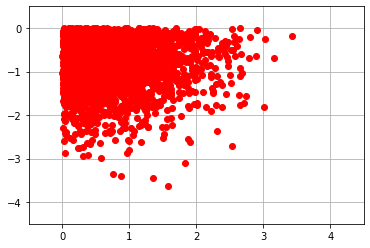

In [74]:
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-4.5, 0.5)

In [75]:
res

array([[ 0.345, -0.546,  0.735, -1.532,  1.068],
       [ 0.217, -0.133, -0.663,  0.255, -1.873],
       [ 0.771, -0.668,  0.871, -0.391,  0.38 ],
       ...,
       [ 0.989, -0.087, -0.607,  0.901,  0.542],
       [ 2.145, -0.33 ,  0.601, -1.574,  0.533],
       [ 0.383, -0.292,  2.182, -1.962, -3.054]])

In [76]:
res[:,0]

array([0.345, 0.217, 0.771, ..., 0.989, 2.145, 0.383])

# SQL에서 pandas로 

In [77]:
# pandas로 읽는것이 보다 효율적

# pandas.io.sql -> SQL 데이터베이스에 저장된 자료를 다루는 함수 포함

In [78]:
import pandas.io.sql as pds

In [79]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 2.27 s


In [80]:
data.head()

,No1,No2,No3,No4,No5
0,-1.28515,-0.13618,0.44692,-0.39484,0.66345
1,0.91687,0.33270,1.96214,0.34807,0.95358
2,-1.37734,0.18087,-0.75833,-1.31354,-0.50228
3,-0.28894,-0.69956,-0.81393,1.50845,-1.64288
4,-0.91097,2.37060,0.05469,0.66294,1.40812


In [81]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 19 ms


,No1,No2,No3,No4,No5
6,0.34479,-0.54576,0.73547,-1.53240,1.06839
7,0.61416,-0.55241,0.05823,-0.67290,-0.27248
13,0.27613,-1.52053,-0.18379,0.32859,1.58766
17,1.08361,-0.20242,-0.45409,2.37106,-0.63537
18,0.29324,-2.09363,-0.13602,0.40660,-0.98253


In [82]:
%%time 
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5)) & 
                           ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 24.9 ms


(-4.920808, 4.842968, -5.2356050000000005, 5.161925)

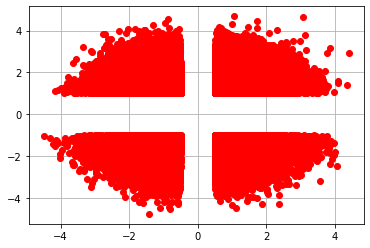

In [83]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True)
plt.axis('tight')

In [84]:
import sys
sys._enablelegacywindowsfsencoding()

pandas와 pytable 결합 -> 속도 더 개선 /
import sys /
sys._enablelegacywindowsfsencoding() 이 두줄 하면 pytable 실행가능

In [85]:
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data

Wall time: 67.2 ms


In [86]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/anrnd/Desktop/파이썬 금융분석/path/numbs.h5s

In [87]:
h5s.close()

In [88]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 47.9 ms


In [89]:
np.allclose(np.array(temp), np.array(data))

True

In [90]:
temp = 0

#  CSV 파일 저장

In [91]:
%time data.to_csv(filename + '.csv')

Wall time: 4.85 s


In [92]:
%%time
pd.read_csv(filename + '.csv')[['No1','No2','No3','No4']].hist(bins = 20)

OSError: Initializing from file failed

#  엑셀파일 저장

In [93]:
%time data[:100000].to_excel(filename + '.xlsx', index = False) 

# 자료 일부분인데도 시간 오래 걸린다

Wall time: 7.29 s


Wall time: 5.55 s


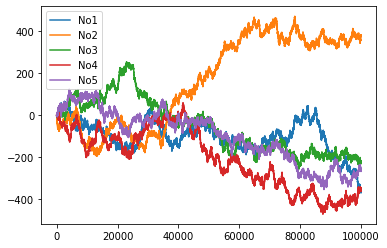

In [94]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()

#  PyTables 이용 고속 입출력

In [95]:
# HDF5 : 데이터베이스 파일 표준의 파이썬 바인딩
# -> 입출력 연산의 성능 최적화 & 가용 하드웨어 최대한 이용하도록 설계되어있다

In [96]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')
# pytable : 파일 기반의 데이터베이스 제공 

In [98]:
rows = 2000000

In [99]:
row_des = {'Date': tb.StringCol(26, pos = 1),
          'No1': tb.IntCol(pos = 2),
          'No2': tb.IntCol(pos = 3),
          'No3': tb.Float64Col(pos = 4),
          'No4': tb.Float64Col(pos = 5)} # 날짜, 두개의 정수, 두개의 부동소수점 

In [100]:
filters = tb.Filters(complevel = 0) # 데이터 필터링 & 제한
tab = h5.create_table('/', 'int_floats', row_des, 
                     title = 'Integers and Floats', 
                     expectedrows = rows, filters = filters)

In [101]:
tab

/int_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [102]:
pointer = tab.row

In [103]:
pointer

/int_floats.row (Row), pointing to row #0

In [104]:
ran_int = np.random.randint(0,10000,size = (rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5) # 샘플 자료 생성

In [105]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append() # 자료 추가 후 포인터를 한행 뒤로 옮겨준다
tab.flush()  # 자료 넣은 후 commit 역활! 잊으면 안돼!

Wall time: 5.76 s


In [106]:
tab

/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [107]:
## Numpy 구조화 배열 활용 -> 같은 결과 

In [108]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<i8'), ('No4', '<i8')])
sarray = np.zeros(len(ran_int), dtype = dty)

In [109]:
sarray

array([(b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), ...,
       (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<i8'), ('No4', '<i8')])

In [110]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] = ran_flo[:,1]    

Wall time: 78.8 ms


In [111]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
               title = 'Integers and Floats',
               expectedrows = rows, filters = filters) # 위의 방법보다 빠르다 (이전 : 약 15초)

Wall time: 61.8 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Int64Col(shape=(), dflt=0, pos=3),
  "No4": Int64Col(shape=(), dflt=0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [112]:
h5

File(filename=C:/Users/anrnd/Desktop/파이썬 금융분석/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Int64Col(shape=(), dflt=0, pos=3),
  "No4": Int64Col(shape=(), dflt=0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [113]:
h5.remove_node('/', 'ints_floats_from_array') # 중복된 테이블 삭제
                                              # array쓴게 좀더 빠르다는거 보여주기위해 했던것이므로

In [114]:
# Table 객체 : 부분접근 불가능

In [115]:
tab[:3]  # 행 선택

array([(b'2021-04-14 16:50:08.409642', 4876, 6198, -1.32126,  1.03669),
       (b'2021-04-14 16:50:08.409642', 2328, 2381,  0.39907,  1.11669),
       (b'2021-04-14 16:50:08.409642', 6104, 3661, -0.53245, -1.59832)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [116]:
tab[:4]['No4']  # 열만 선택

array([ 1.03669,  1.11669, -1.59832, -1.02185])

In [117]:
tab[1][2]

2381

In [118]:
# Numpy 유니버셜 함수를 테이블 or 테이블의 부분집합에 적용가능
%time np.sum(tab[:]['No3'])

Wall time: 79.8 ms


799.6470500000008

In [119]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 76.8 ms


133351001.77995491

Wall time: 160 ms


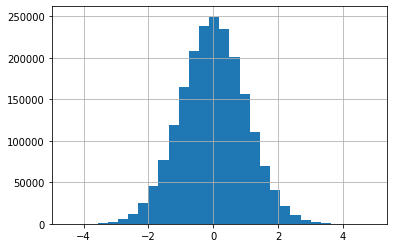

In [120]:
%%time
plt.hist(tab[:]['No3'], bins = 30)
plt.grid(True)
# 그래프 생성은 ndarray와 비슷하게 작동

In [121]:
%%time
res = np.array([(row['No3'],row['No4']) for row in
                tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 284 ms


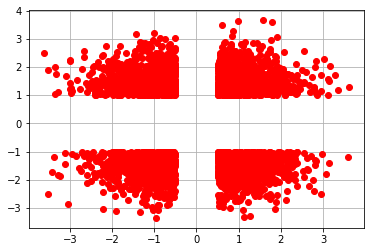

In [122]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [123]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              4.882
Ave              0.000
Min             -4.505
Std              1.000
Wall time: 56.8 ms


In [124]:
%%time
results = [(row['No1'], row['No2']) for row in
          tab.where('((No1 > 9800) | (No1 < 200)) \
          & ((No2 > 4500) & (No2 < 5500))')]

for res in results[:4]:
    print(res)

(9871, 4541)
(9968, 4742)
(9993, 5362)
(167, 4520)
Wall time: 76.8 ms


In [125]:
%%time
results = [(row['No1'], row['No2']) for row in
          tab.where('(No1 == 1234) & (No2 > 9776)')]

for res in results:
    print(res)

(1234, 9825)
(1234, 9973)
Wall time: 55.8 ms


# 압축된 테이블 

In [126]:
# 압축 -> 디스크 공간 절약 & 입출력 연산 성능 개선

In [127]:
# tab : 압축 x
# tabc : 압축 o

In [128]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w')

In [129]:
filters = tb.Filters(complevel = 4, complib = 'blosc') # complevel : 압축수준 0~9로 complib : 압축파일 저장 라이브러리 지정
tabc = h5c.create_table('/', 'ints_floats', sarray,
                       title = 'Integers and Floats',
                       expectedrows = rows, filters = filters)

In [130]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
               tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                          & ((No4 < -1) | (No4 > 1))')])[::100] # 난 왜 더 빠를까..? p.242와 p.244 비교

Wall time: 151 ms


In [131]:
%time arr_non = tab.read()

Wall time: 56.8 ms


In [132]:
%time arr_com = tabc.read()  # 읽기 속도 : 압축한게 훨씬 오래 걸린다
                             # BUT, 압축 -> 디스크 공간 절약 -> 백업, 서버 사이 or 데이터 센터 사이 대량 자료 전성에 중요

Wall time: 106 ms


In [133]:
h5c.close()

# 배열 다루기

In [134]:
# pytable에서도 ndarray 빠르고 효율적으로 읽거나 저장 가능

In [135]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)
# -> 한줄씩 table에 쓰는것 보다 훨씬 빠르다 p.238과 p.245비교

Wall time: 36.9 ms


In [136]:
h5

File(filename=C:/Users/anrnd/Desktop/파이썬 금융분석/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [137]:
h5.close()

# out-of-memory 연산

In [138]:
# 메모리보다 큰 배열의 연산을 구현 가능하게 해준다

In [139]:
filename = path +'array.h5'
h5 = tb.open_file(filename, 'w')

In [140]:
# EArray : 확장 가능 배열??

In [141]:
# 첫 번째 차원 : 확장가능, 두 번째 차원 : 1000개의 고정 폭 
n = 1000
ear = h5.create_earray(h5.root, 'ear',
                     atom = tb.Float64Atom(),
                     shape = (0,n))

In [142]:
%%time
rand = np.random.standard_normal((n,n))
for i in range(300):
    ear.append(rand)
ear.flush()

Wall time: 1.78 s


In [143]:
ear  # chunkshape 질문

/ear (EArray(300000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [144]:
ear.size_on_disk # 객체크기 : 6GB

2400000000

수치 표현식을 효율적으로 : Expr 모듈

In [145]:
out = h5.create_earray(h5.root, 'out',
                      atom = tb.Float64Atom(),
                      shape = (0, n))

In [146]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')  # 수치 표현식 -> 문자열로 입력
expr.set_output(out, append_mode = True)         # 결과 저장할 디스크 기반의 배열 설정
%time expr.eval()                                # 계산 -> 저장

Wall time: 4.67 s


/out (EArray(300000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [147]:
out[0,:10]

array([ 0.07919643, -1.47693084, -1.67503352,  3.09799193,  1.08951396,
        4.12342984,  3.85328993,  3.53293668,  1.61413179,  3.36911665])

In [148]:
%time imarray = ear.read()

Wall time: 1.65 s


In [149]:
import numexpr as ne

In [150]:
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [151]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0,:10]

Wall time: 603 ms


array([ 0.07919643, -1.47693084, -1.67503352,  3.09799193,  1.08951396,
        4.12342984,  3.85328993,  3.53293668,  1.61413179,  3.36911665])

In [152]:
h5.close()